# <font size="7"> **Assignment-6**</font>
I hope this assignment will give you clarity on how mathematical models like **Multilayer Perceptrons (MLP)** can be made from scratch using **PyTorch** & can be used to solve complex, non-linear geometric problems **without relying on black-box libraries**.

---
# ⚫ **Mission Critical: The Exclusion Zone Protocol**

**Date:** Year 2142  
**Location:** Exoplanet *Kepler-186f*   **Clearance:** IITians

---

### **⚫ The Story**
Humanity has colonized the distant exoplanet *Kepler-186f*. While the surface is habitable, the planet's magnetic core is unstable. The **Global Defense Council (GDC)** has identified a dangerous phenomenon known as the **"Radiation Ring."**

Sensors indicate that the safe zones on the planet follow a peculiar geometry:
* ⚫ **The Core Zone:** Distance $< 2$ km from the colony center (Safe).
* ⚫ **The Outer Wilds:** Distance $> 4$ km from the colony center (Safe).
* ⚫ **The Dead Zone:** The region **between 2 km and 4 km** is flooded with lethal gamma radiation.

Your engineering team has deployed **3,000 sensor drones** across the colony to map this danger. Each drone reports its coordinates $(x, y)$ and a binary label:
* `1`: Radiation Detected (Dead Zone)
* `0`: Safe Zone

 **⚫ The Problem:** The sensors are cheap and prone to interference. Approximately **5%** of the drones are malfunctioning and reporting the wrong safety status (noise). The GDC mainframe is a legacy system that forbids the use of modern "Neural Libraries" (i.e., you cannot use `torch.nn` or `torch.optim`). You must build a **Multi-Layer Perceptron (MLP) from scratch** to filter out the noise and mathematically define the Exclusion Zone boundaries using **PyTorch**. ( Hint: You know this is a binary classification problem, which Loss function would you use?? )

---

### **⚫ Your Objective**

1.  **Initialize the System:** Use your **Group Number** as the random seed. This ensures your team works on a unique sensor distribution pattern.
2.  **Architect the Filter:** Construct a neural network with **3 hidden layers** (16 neurons each) to learn the non-linear "donut" shape of the Dead Zone.
3.  **Manual Calibration:** You cannot use auto-optimizers. You must manually calculate the gradients (Backpropagation) and update the system weights using **Gradient Descent**.
4.  **Verify Integrity:** Split your sensor data (70% training, 30% validation). Prove that your system doesn't just memorize the malfunctioning sensors (overfitting) but actually learns the geometric shape of the Dead Zone.

---

## ⚫ Engineering Constraints (Read Carefully)

**1. Restricted Modules**
*  **Forbidden:** You are strictly forbidden from importing `torch.nn` (Layers/Loss) or `torch.optim` (Optimizers).
*  **Allowed:** `import torch`, `import matplotlib.pyplot`, `import pandas`, `import numpy`, using `sklearn`.


**2. The Mechanics**
* **Forward Pass:** Must be implemented using raw matrix multiplication (`torch.matmul`) and bias addition.
* **Backward Pass:** You **MAY** use `loss.backward()` to compute gradients automatically (Autograd).
* **Optimization:** You **MUST** implement the weight updates manually (Stochastic Gradient Descent).
    > `w_new = w_old - learning_rate * w_old.grad`

**3. Loss Function**
Since `torch.nn` is banned, you must implement **Binary Cross Entropy** manually using basic tensor math.

$$Loss = -\frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(\hat{y}_i) + (1-y_i) \cdot \log(1-\hat{y}_i)]$$

* **Note:** Ensure you handle the log of zero (numerical stability) or use `torch.clamp` to avoid `NaN` errors.

**4. Visual Proof:** Your final output must include a Decision Boundary Map showing the "Donut" shape.


---

### ⚫ **The GDC Dashboard (Required Output)**



The Global Defense Council requires visual confirmation that your system is stable before we can upload it to the drone fleet. You must generate a **3-Panel Heads-Up Display (HUD)** containing the following telemetry:

**1. System Error Trajectory (Loss Plot)**
* **Mission:** Plot the **Training Loss** (Blue) vs. **Validation Loss** (Orange) over all epochs.
* **Why:** We need to confirm that the system is actually learning and not just diverging (exploding gradients).

**2. Integrity Check (Accuracy Plot)**
* **Mission:** Plot the **Training Accuracy** vs. **Validation Accuracy**.
* **Why:** If Training Accuracy is high (95%) but Validation Accuracy is low (80%), you have failed to generalize. This is a sign of **Overfitting**—memorizing sensor noise instead of the Radiation Ring.

**3. Geospatial Threat Map (Decision Boundary)**
* **Mission:** Visualize the **Validation Set** on a 2D map.
* **Overlay:** Draw the neural network's **Decision Boundary** (the contours where confidence = 0.5).
* **Why:** The Commander needs to *see* the "Donut" shape. If your boundary looks like a jagged mess, the model is rejected.

---

In [ ]:
import torch
import numpy as np
# ===========================================================
# PART 1: Data Generation (The Exclusion Zone)
# ===========================================================

# ⚠️ INSTRUCTION: Replace 1 with your actual Group Number
GROUP_NUMBER = 1

# Set seed for reproducibility
torch.manual_seed(GROUP_NUMBER)
np.random.seed(GROUP_NUMBER)

def generate_data(n_samples=3000):
    """
    Generates 3000 sensor readings for the Kepler-186f Exclusion Zone.
    Shape: Concentric circles (Donut).
    Logic:
      - Dead Zone (1): 2km < distance < 4km
      - Safe Zone (0): distance < 2km OR distance > 4km
    """
    # Generate random coordinates between -5 and 5 km
    X = (torch.rand(n_samples, 2) * 10) - 5

    # Calculate distance from center (radius)
    radius = torch.sqrt(X[:, 0]**2 + X[:, 1]**2)

    # Assign Labels: 1 if inside the Dead Zone, 0 otherwise
    y = ((radius > 2) & (radius < 4)).float().view(-1, 1)

    # Add 5% Noise (Malfunctioning Drones)
    n_noise = int(0.05 * n_samples)
    noise_indices = torch.randperm(n_samples)[:n_noise]
    y[noise_indices] = 1 - y[noise_indices] # Flip labels

    return X, y

# Generate the dataset
X_full, y_full = generate_data(3000)

print(f"Data Generated: {X_full.shape} samples.")
print(f"Target Generated: {y_full.shape} labels.")

Data Generated: torch.Size([3000, 2]) samples.
Target Generated: torch.Size([3000, 1]) labels.


In [ ]:
# ==============================================================================
# Code from here. Best of luckk :)
# ==============================================================================

In [ ]:
np.random.seed(42)
n= 200

# input features (i have taken 2 features)
X = np.random.rand(n, 2)

# true weights
true_w = np.array([3.0, -2.0])
true_b = 5.0

#  adding noise
noise = np.random.randn(n) * 0.5

# target variable
y = X @ true_w + true_b + noise

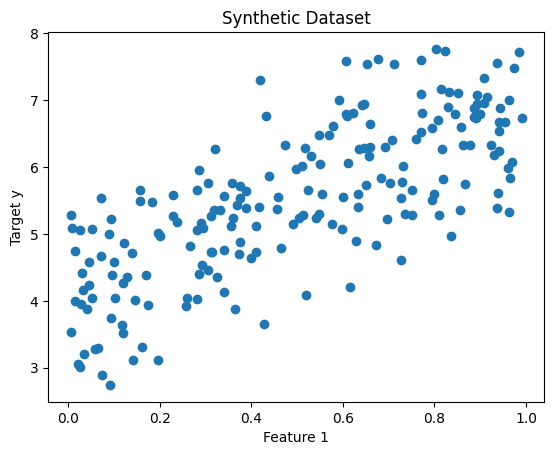

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], y)
plt.xlabel("Feature 1")
plt.ylabel("Target y")
plt.title("Synthetic Dataset")
plt.show()

In [ ]:
class FeatureScaler:
    def __init__(self):
        self.mu = None
        self.sigma = None

    def fit(self, data):
        # compute per-feature statistics
        self.mu = data.mean(axis=0)
        self.sigma = data.std(axis=0)

        # avoid division by zero
        self.sigma = np.where(self.sigma == 0, 1.0, self.sigma)
        return self

    def scale(self, data):
        if self.mu is None or self.sigma is None:
            raise ValueError("Scaler has not been fitted yet.")
        return (data - self.mu) / self.sigma

    def fit_and_scale(self, data):
        return self.fit(data).scale(data)

In [ ]:
class LinearRegGD:
    def __init__(self, learning_rate=0.01, n_iters=1000, reg_strength=0.0):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.reg_strength = reg_strength
        self.weights = None
        self.bias = None
        self.history = []

    def fit(self, features, targets):
        m, d = features.shape

        # parameter initialization
        self.weights = np.zeros(d)
        self.bias = 0.0

        for _ in range(self.n_iters):
            # forward pass
            preds = np.dot(features, self.weights) + self.bias
            residuals = preds - targets

            # cost function
            mse = np.mean(residuals ** 2)
            reg_term = self.reg_strength * np.sum(self.weights ** 2)
            self.history.append(mse + reg_term)

            # gradient computation
            grad_w = (2.0 / m) * (features.T @ residuals)
            grad_w += 2.0 * self.reg_strength * self.weights

            grad_b = (2.0 / m) * residuals.sum()

            # parameter update
            self.weights -= self.learning_rate * grad_w
            self.bias -= self.learning_rate * grad_b

        return self

    def predict(self, features):
        return np.dot(features, self.weights) + self.bias

In [ ]:
# Normalize input features
scaler = FeatureScaler()
X_norm = scaler.fit_and_scale(X)

# Initialize and train regression model
regressor = LinearRegGD(
    learning_rate=0.01,
    n_iters=1000,
    reg_strength=0.1
)
regressor.fit(X_norm, y)

# Generate predictions on training data
predictions = regressor.predict(X_norm)

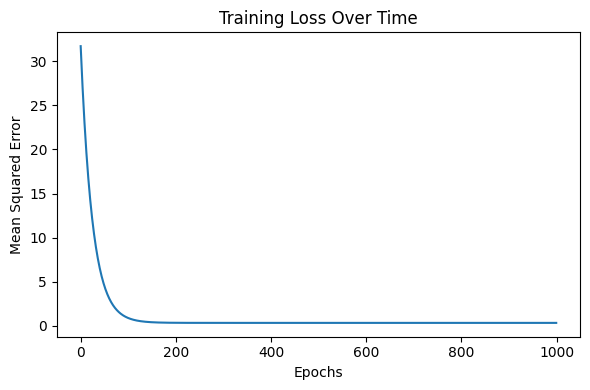

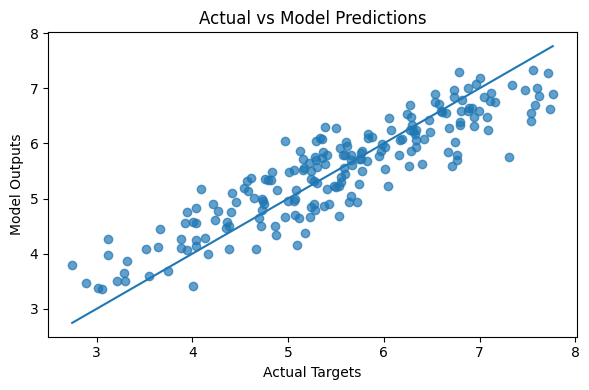

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(regressor.history)
plt.title("Training Loss Over Time")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))

plt.scatter(y, predictions, alpha=0.7)
min_val, max_val = y.min(), y.max()
plt.plot([min_val, max_val], [min_val, max_val])

plt.xlabel("Actual Targets")
plt.ylabel("Model Outputs")
plt.title("Actual vs Model Predictions")

plt.tight_layout()
plt.show()

In [ ]:
#Question 2
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:

class LogisticRegGD:
    def __init__(self, learning_rate=0.01, n_iters=1000, reg=0.0):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.reg = reg
        self.weights = None
        self.bias = None
        self.history = []

    def _sigmoid(self, t):
        return 1.0 / (1.0 + np.exp(-t))

    def fit(self, features, labels):
        m, d = features.shape

        # initialize parameters
        self.weights = np.zeros(d)
        self.bias = 0.0
        eps = 1e-8

        for _ in range(self.n_iters):
            # forward pass
            linear_output = np.dot(features, self.weights) + self.bias
            probs = self._sigmoid(linear_output)

            # loss (binary cross-entropy + L2)
            ce_loss = -np.mean(
                labels * np.log(probs + eps) +
                (1 - labels) * np.log(1 - probs + eps)
            )
            total_loss = ce_loss + self.reg * np.sum(self.weights ** 2)
            self.history.append(total_loss)

            # gradients
            diff = probs - labels
            grad_w = (features.T @ diff) / m
            grad_w += 2 * self.reg * self.weights
            grad_b = diff.mean()

            # parameter update
            self.weights -= self.learning_rate * grad_w
            self.bias -= self.learning_rate * grad_b

        return self

    def predict_proba(self, features):
        scores = np.dot(features, self.weights) + self.bias
        return self._sigmoid(scores)

    def predict(self, features):
        return (self.predict_proba(features) >= 0.5).astype(int)

In [ ]:
np.random.seed(42)

num_points = 200
features = np.random.normal(0, 1, size=(num_points, 2))

actual_weights = np.array([2.0, -3.0])
actual_bias = 0.5

scores = np.dot(features, actual_weights) + actual_bias
probabilities = 1.0 / (1.0 + np.exp(-scores))

labels = (probabilities >= 0.5).astype(int)

In [ ]:
# Feature normalization
scaling_tool = FeatureScaler()
X_norm = scaling_tool.fit_and_scale(X)

# Initialize and train logistic regression model
classifier = LogisticRegGD(
    learning_rate=0.1,
    n_iters=1000,
    reg=0.1
)
classifier.fit(X_norm, y)

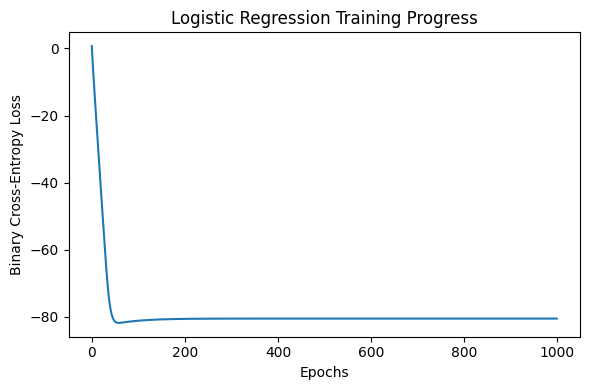

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(classifier.history)
plt.xlabel("Epochs")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Logistic Regression Training Progress")

plt.tight_layout()
plt.show()

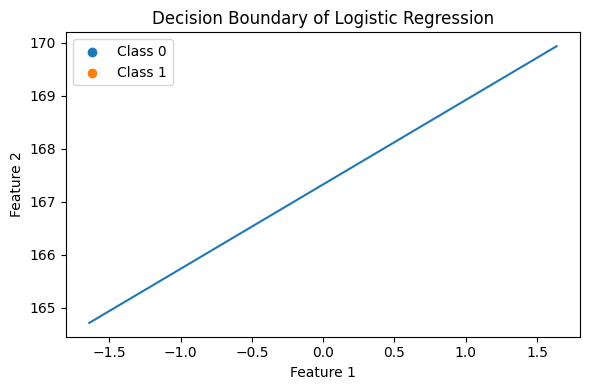

In [ ]:
# Plotting the separating hyperplane learned by the classifier
def compute_boundary(x_axis, clf):
    w = clf.weights
    bias = clf.bias
    return -(w[0] * x_axis + bias) / w[1]

x_axis = np.linspace(X_norm[:, 0].min(), X_norm[:, 0].max(), 100)
y_axis = compute_boundary(x_axis, classifier)

plt.figure(figsize=(6, 4))

plt.scatter(X_norm[y == 0][:, 0], X_norm[y == 0][:, 1], label="Class 0")
plt.scatter(X_norm[y == 1][:, 0], X_norm[y == 1][:, 1], label="Class 1")

plt.plot(x_axis, y_axis)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary of Logistic Regression")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Model predictions
pred_labels = classifier.predict(X_norm)

# Accuracy computation
acc = (pred_labels == y).mean()

print(f"Final Accuracy: {acc}")

Final Accuracy: 0.0


In [ ]:
#QUESTION III
def kmeans_on_matrix(mat, num_clusters, iterations=100):
    rows, cols = mat.shape

    # convert matrix to 1D array
    flat_data = mat.ravel()

    # initialize cluster centers randomly from data
    centers = np.random.choice(flat_data, size=num_clusters, replace=False)

    for _ in range(iterations):
        # compute cluster assignments
        cluster_labels = np.empty(flat_data.size, dtype=int)

        for idx, value in enumerate(flat_data):
            cluster_labels[idx] = np.argmin(np.abs(centers - value))

        # recompute centers
        updated_centers = centers.copy()

        for c in range(num_clusters):
            members = flat_data[cluster_labels == c]
            if members.size > 0:
                updated_centers[c] = members.mean()
            else:
                # handle empty cluster
                updated_centers[c] = np.random.choice(flat_data)

        # check convergence
        if np.allclose(centers, updated_centers):
            break

        centers = updated_centers

    # reshape labels back to matrix form
    label_map = cluster_labels.reshape(rows, cols)

    # build index map for each cluster
    index_map = {c: [] for c in range(num_clusters)}
    for r in range(rows):
        for c in range(cols):
            index_map[label_map[r, c]].append((r, c))

    return label_map, index_map, centers

In [ ]:
np.random.seed(0)

# generate random matrix
matrix = np.random.random((5, 5))
num_clusters = 3

labels_map, index_map, cluster_centers = kmeans_on_matrix(matrix, num_clusters)

print("Input Matrix:\n", matrix)
print("\nCluster Assignment Map:\n", labels_map)
print("\nCluster Centers:\n", cluster_centers)
print("\nCluster Index Map:\n", index_map)


Input Matrix:
 [[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
 [0.64589411 0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606]
 [0.0871293  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443]]

Cluster Assignment Map:
 [[1 0 1 1 1]
 [1 1 0 0 1]
 [0 1 1 0 2]
 [2 2 0 0 0]
 [0 0 1 0 2]]

Cluster Centers:
 [0.84791288 0.51454565 0.07416455]

Cluster Index Map:
 {0: [(0, 1), (1, 2), (1, 3), (2, 0), (2, 3), (3, 2), (3, 3), (3, 4), (4, 0), (4, 1), (4, 3)], 1: [(0, 0), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 4), (2, 1), (2, 2), (4, 2)], 2: [(2, 4), (3, 0), (3, 1), (4, 4)]}
